In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H, input_shape=(D,),
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))
y_pred = model(x)
loss = tf.losses.mean_squared_error(y_pred, y)
optimizer = tf.train.GradientDescentOptimizer(1e0)
updates = optimizer.minimize(loss)

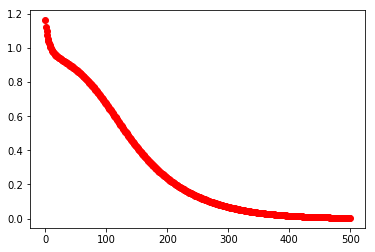

1.1625577 0.003900213


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D), y: np.random.randn(N , D),}
    loss_summary=[]
    step=500
    for i in range(step):
        out=sess.run([loss, updates], feed_dict = values)
        loss_val,_ = out
        loss_summary.append(loss_val)
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[0],loss_summary[step-1])